In [ ]:
import nltk
nltk.data.clear_cache()
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
print(nltk.data.path)


['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')
                                                  v2  \
0  Go until jurong point, crazy.. Available only ...   
1                      Ok lar... Joking wif u oni...   
2  Free entry in 2 a wkly comp to win FA Cup fina...   
3  U dun say so early hor... U c already then say...   
4  Nah I don't think he goes to usf, he lives aro...   

                                      processed_text  
0  [go, jurong, point, crazi, avail, bugi, n, gre...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...  
3      [u, dun, say, earli, hor, u, c, alreadi, say]  
4       [nah, think, goe, usf, live, around, though]  


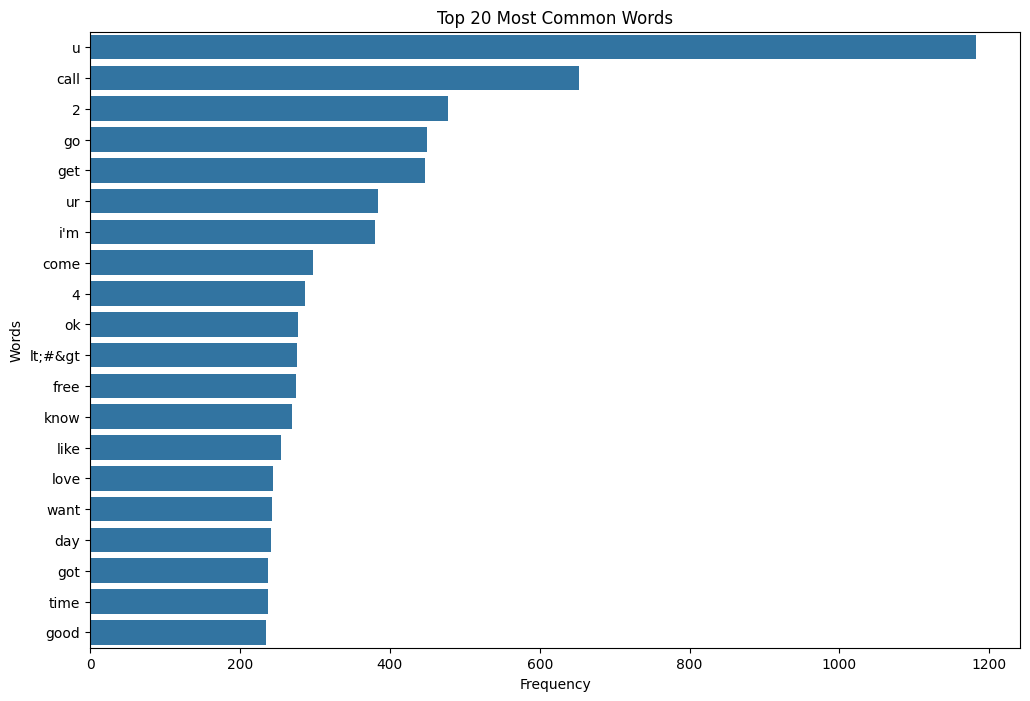

Word2Vec embedding for 'free':
[-0.297848    0.58484006  0.10814488  0.22941807 -0.02257081 -1.0247967
  0.18751854  1.3406737  -0.32415122 -0.5029358  -0.43474364 -0.6582112
 -0.24627557  0.26707846  0.24013934 -0.4248157   0.10203089 -0.4920211
  0.01339425 -0.97619915  0.21793844  0.26249832  0.3276217  -0.22325985
 -0.1576055   0.01053639 -0.5033983  -0.5001634  -0.5332218   0.02520641
  0.8310148   0.1189656   0.35083374 -0.52965903 -0.30866945  0.7250342
  0.06916456 -0.46313325 -0.4348244  -1.1872679  -0.05461132 -0.5519491
 -0.28763264  0.00930387  0.42234585 -0.2858819  -0.27017322 -0.11364813
  0.15753753  0.3081462   0.36850944 -0.5946886  -0.19669077  0.01163218
 -0.28940532  0.34133098  0.33083037 -0.14370362 -0.62449217  0.0968821
  0.2185858   0.26048464 -0.09864794  0.07645213 -0.4738151   0.5206896
  0.36700806  0.44883752 -0.6350375   0.69763076 -0.23684265  0.23972024
  0.6273411  -0.30529293  0.7066985   0.4595659  -0.11025067  0.1346649
 -0.4135483   0.14760853 -0.

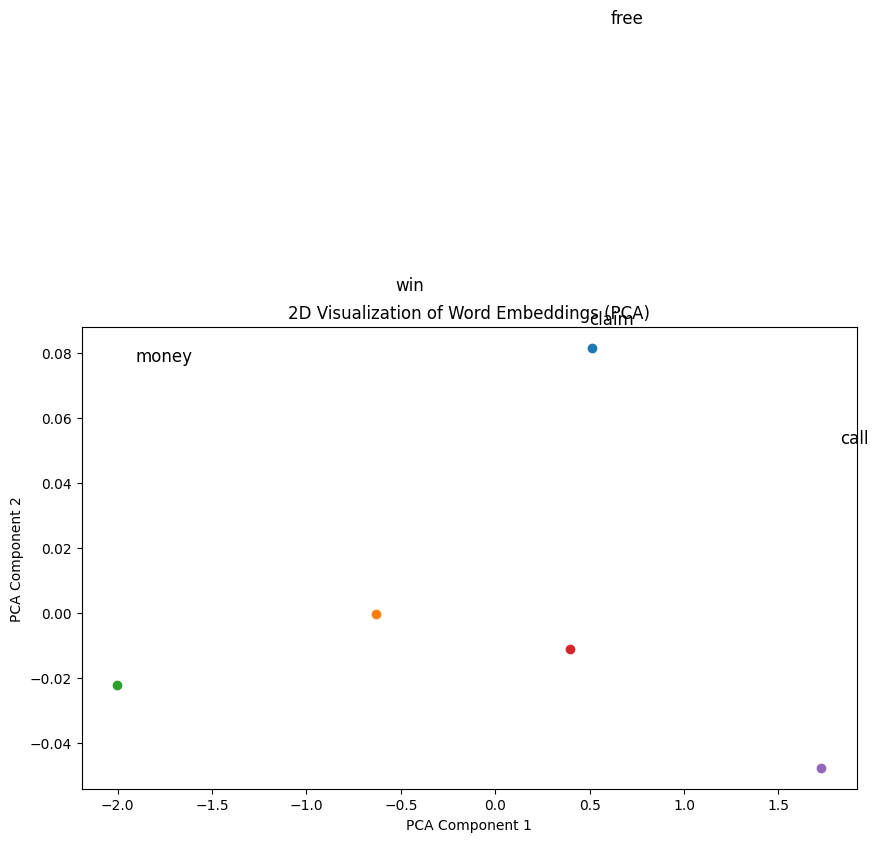

In [24]:
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
import string
import matplotlib.pyplot as plt
import seaborn as sns

# Download required NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

# Load the dataset (ensure to provide the correct path)
dataset_path = "spam.csv"
df = pd.read_csv(dataset_path, encoding='latin-1')

# Check column names to identify the correct text column
print(df.columns)

# Text Preprocessing
def preprocess_text(text):
    # Manual Tokenization (by splitting on spaces)
    text = text.lower()  # Convert to lowercase
    tokens = text.split()  # Split by spaces to get tokens

    # Removing punctuation manually
    tokens = [word.strip(string.punctuation) for word in tokens]

    # Remove empty tokens that might result from stripping punctuation
    tokens = [word for word in tokens if word]

    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

# Adjust the column name based on your dataset
df['processed_text'] = df['v2'].apply(preprocess_text)

# Example of tokenized and processed text
print(df[['v2', 'processed_text']].head())

# Visualizing the most frequent words in the processed text
from collections import Counter

# Flattening the list of tokens and counting word frequencies
all_tokens = [token for tokens in df['processed_text'] for token in tokens]
word_freq = Counter(all_tokens)

# Displaying the most common words
most_common_words = word_freq.most_common(20)

# Plotting the most common words
words, freqs = zip(*most_common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=freqs, y=words)
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()

# Training Word2Vec model
# We use the processed tokens for training the Word2Vec model
sentences = df['processed_text'].tolist()

# Create Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# Save the model (optional)
word2vec_model.save("word2vec_model.model")

# Example of getting word embeddings for a word
word_embedding = word2vec_model.wv['free']  # Example word 'free'
print("Word2Vec embedding for 'free':")
print(word_embedding)

# Visualizing the word embeddings for a few words (using PCA for dimensionality reduction)
from sklearn.decomposition import PCA

# Select a few words for visualization
words_to_visualize = ['free', 'win', 'money', 'claim', 'call']
word_vectors = [word2vec_model.wv[word] for word in words_to_visualize]

# Apply PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

# Plotting the words in 2D space
plt.figure(figsize=(10, 6))
for i, word in enumerate(words_to_visualize):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
    plt.text(reduced_vectors[i, 0] + 0.1, reduced_vectors[i, 1] + 0.1, word, fontsize=12)
plt.title("2D Visualization of Word Embeddings (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df['processed_text'], df['v1'], test_size=0.2, random_state=42)

# Now you can proceed with further steps like training a classifier (e.g., Logistic Regression) on the processed text
